# Data Project: Victor Li

**Table of contents**<a id='toc0_'></a>    
- 0. [Modules](#toc0_)   

- 1. [Aggregate Inflation in Denmark](#toc1_)    
  - 1.1. [Basics](#toc1_1_)    
      - 1.1.1 [Excercise 1.1.1](#toc1_1_1_) 
      - 1.1.2 [Excercise 1.1.2](#toc1_1_2_) 
      - 1.1.3 [Excercise 1.1.3](#toc1_1_3_) 
  - 1.2. [Instantaneous Inflation](#toc1_2_)
      - 1.2.1 [Excercise 1.2.1](#toc1_2_1_) 
      - 1.2.2 [Excercise 1.2.2](#toc1_2_2_) 
      - 1.2.3 [Excercise 1.2.3](#toc1_2_3_)     
  - 1.3. [Core Inflation](#toc1_3_)    
  - 1.4. [Disaggregated Inflation in Denmark](#toc1_4_)  
      - 1.4.1 [Excercise 1.4.1](#toc1_4_1_) 
      - 1.4.2 [Excercise 1.4.2](#toc1_4_2_) 
      - 1.4.3 [Excercise 1.4.3](#toc1_4_3_)   

- 2. [International Comparison](#toc2_)    
  - 2.1. [CPI vs HICP](#toc2_1_)    
  - 2.2. [Across Countries](#toc2_2_)    
      - 2.2.1 [Excercise 2.2.1](#toc1_2_1_) 
      - 2.2.2 [Excercise 2.2.2](#toc1_2_2_) 
      - 2.2.3 [Excercise 2.2.3](#toc1_2_3_)     
  
- 3. [Extension](#toc3_)  

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Use of AI tools: Throughout this excercise I have used ChatGPT and Copilot to debug code, but I have always tried to write the code myself, unless stated otherwise

## 0. <a id='toc0_'></a>[Modules](#toc0_)

Import all necessary modules. I followed the procedure in PS 2

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# install with: !pip install "git+https://github.com/alemartinello/dstapi"
!pip install "git+https://github.com/alemartinello/dstapi"

from dstapi import DstApi

  Cloning https://github.com/alemartinello/dstapi to c:\users\victo\appdata\local\temp\pip-req-build-asa6lpnn
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\victo\AppData\Local\Temp\pip-req-build-asa6lpnn'


## 1. <a id='toc1_'></a>[Aggregate Inflation in Denmark](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Basics](#toc0_)

First I downloaded the data. I followed the procedure in PS 2

In [2]:
# Create an instance of the DstApi class for the PRIS113 dataset
pris113_api = DstApi('pris113') 

# Get the base parameters for the API call
params = pris113_api._define_base_params(language='en')

# Display the base parameters
display(params)

# Get the data from the API with the specified parameters
pris113 = pris113_api.get_data(params)

# Create a copy of the original dataframe to not overwrite it
pris113_true = pris113.copy()

{'table': 'pris113',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [3]:
# Show head of the dataframe
pris113_true.head()

,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M05,34.5
2,Consumer price index,1980M09,35.5
3,Consumer price index,1981M01,36.5
4,Consumer price index,1981M05,38.6


### 1.1.1 <a id='toc1_1_1_'></a>[Excercise 1.1.1](#toc0_)

First I convert TID to datetime to be able to sort by date

In [4]:
# Convert 'TID' to datetime using Hint II
pris113_true["date"] = pd.to_datetime(pris113_true["TID"], format="%YM%m")

In [5]:
# Extract year and month from date
pris113_true["year"] = pris113_true["date"].dt.year
pris113_true["month"] = pris113_true["date"].dt.month

# Sort by date
pris113_true = pris113_true.sort_values("date").reset_index(drop=True)

# Check the result
pris113_true.head()

,TYPE,TID,INDHOLD,date,year,month
0,Consumer price index,1980M01,33.0,1980-01-01,1980,1
1,Consumer price index,1980M02,33.3,1980-02-01,1980,2
2,Consumer price index,1980M03,33.8,1980-03-01,1980,3
3,Consumer price index,1980M04,34.0,1980-04-01,1980,4
4,Consumer price index,1980M05,34.5,1980-05-01,1980,5


Index CPI to 100 for the year 2020

In [6]:
# Convert INDHOLD to numeric
pris113_true["INDHOLD"] = pd.to_numeric(pris113_true["INDHOLD"], errors="coerce")

# Calculate average CPI for base year 2020
base_2020 = pris113_true.loc[pris113_true["year"] == 2020, "INDHOLD"].mean()

# Create CPI that is indexed to 100 on average on 2020
pris113_true["CPI_2020"] = pris113_true["INDHOLD"] / base_2020 * 100

# Display result
pris113_true.head()


,TYPE,TID,INDHOLD,date,year,month,CPI_2020
0,Consumer price index,1980M01,33.0,1980-01-01,1980,1,31.904608
1,Consumer price index,1980M02,33.3,1980-02-01,1980,2,32.194650
2,Consumer price index,1980M03,33.8,1980-03-01,1980,3,32.678053
3,Consumer price index,1980M04,34.0,1980-04-01,1980,4,32.871415
4,Consumer price index,1980M05,34.5,1980-05-01,1980,5,33.354818


In [7]:
# Verify that the 2020 average CPI equals 100
avg_2020_indexed = pris113_true.loc[pris113_true["year"] == 2020, "CPI_2020"].mean()
print(f"Average CPI_2020 in 2020: {avg_2020_indexed:.2f}")

Average CPI_2020 in 2020: 100.00


Plot CPI indexed to 100 on average in 2020

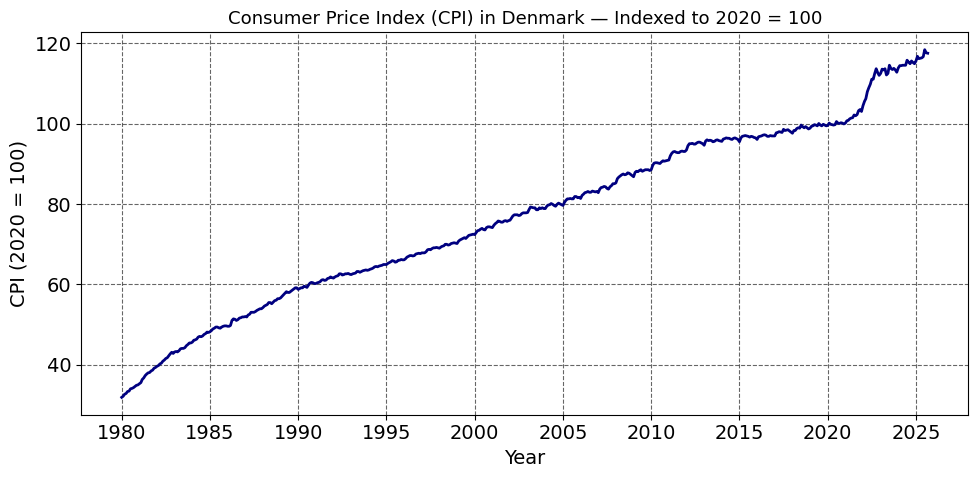

In [8]:
# Plot CPI over time (indexed to 2020 = 100)
plt.figure(figsize=(10,5))
plt.plot(pris113_true["date"], pris113_true["CPI_2020"], color="navy", linewidth=2)

# Add title, axis labels, and grid
plt.title("Consumer Price Index (CPI) in Denmark — Indexed to 2020 = 100", fontsize=13)
plt.xlabel("Year")
plt.ylabel("CPI (2020 = 100)")
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust layout and display
plt.tight_layout()
plt.show()

### 1.1.2 <a id='toc1_1_2_'></a>[Excercise 1.1.2](#toc0_)

To calculate inflation rate, I use the pandas function .pct_change, as suggested by Hint 1

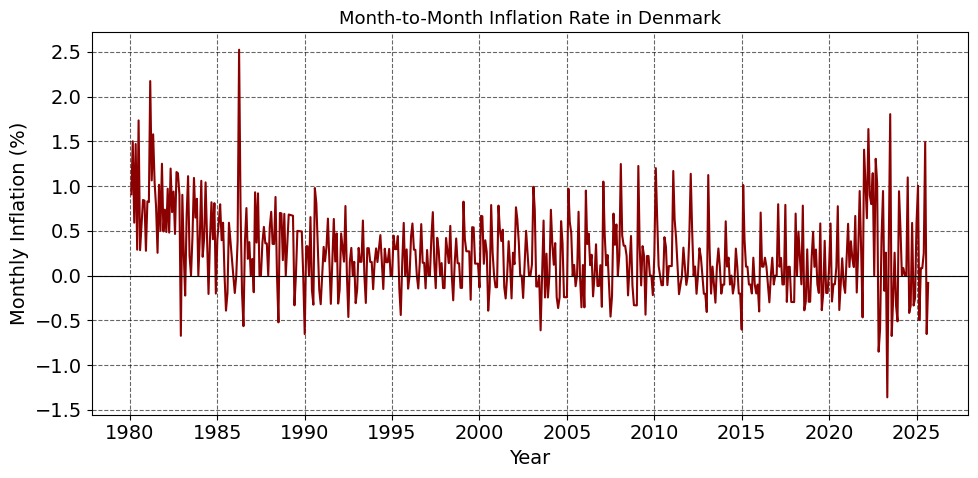

In [9]:
# Calculate month-to-month inflation rate
pris113_true["pi_month"] = pris113_true["CPI_2020"].pct_change()

# Plot 
plt.figure(figsize=(10,5))
plt.plot(pris113_true["date"], pris113_true["pi_month"] * 100, color="darkred", linewidth=1.5)

# Add title, labels, and grid
plt.title("Month-to-Month Inflation Rate in Denmark", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Monthly Inflation (%)")
plt.axhline(0, color="black", linewidth=0.8) # Use 0 as baseline 
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 1.1.3 <a id='toc1_1_3_'></a>[Excercise 1.1.3](#toc0_)

Once again to calculate inflation rate, I use the pandas function .pct_change

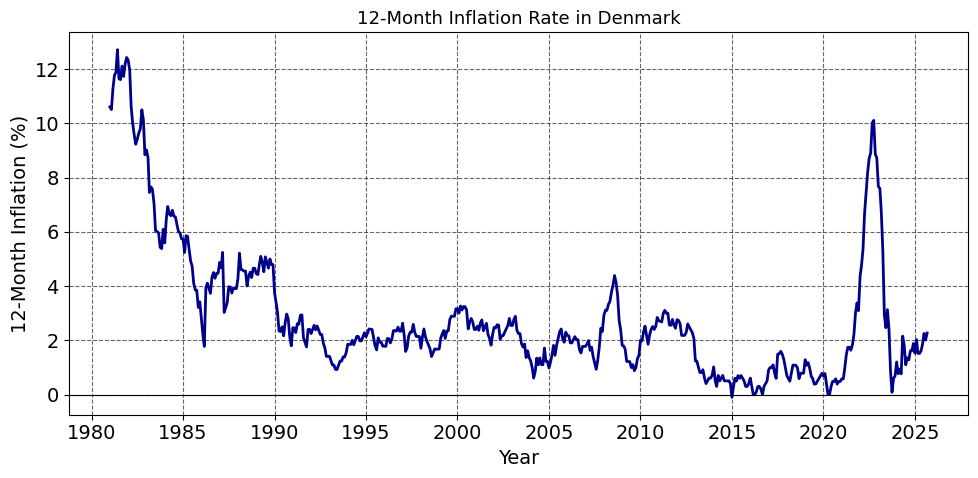

In [10]:
# Calculate 12-month inflation rate
pris113_true["pi_12month"] = pris113_true["CPI_2020"].pct_change(periods=12)

# Plot
plt.figure(figsize=(10,5))
plt.plot(pris113_true["date"], pris113_true["pi_12month"] * 100, color="darkblue", linewidth=2)

# Add title, labels, and grid
plt.title("12-Month Inflation Rate in Denmark", fontsize=13)
plt.xlabel("Year")
plt.ylabel("12-Month Inflation (%)")
plt.axhline(0, color="black", linewidth=0.8)  # Use 0 as baseline 
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 1.2. <a id='toc1_2_'></a>[Instantaneous Inflation](#toc0_)

### 1.2.1 <a id='toc1_2_1_'></a>[Excercise 1.2.1](#toc0_)

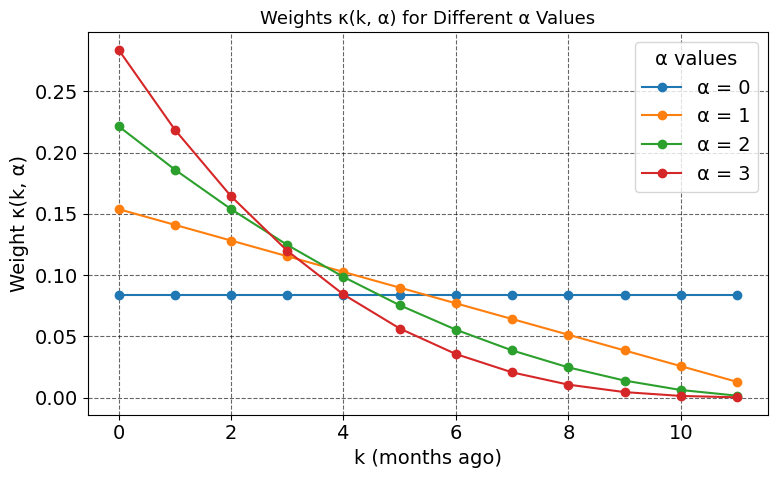

In [11]:
# Define parameters
T = 12                 # number of months
ks = np.arange(0, T)   # months ago, so k = 0, 1, 2, ..., 11
alphas = [0, 1, 2, 3]  # weighting strengths

# Define κ(k, α) function 
def kappa(k, alpha):
    numerator = (T - k) ** alpha
    denominator = sum((T - j) ** alpha for j in range(T))
    return numerator / denominator

# Compute and plot κ(k, α) for each α
plt.figure(figsize=(8,5))
for alpha in alphas:
    kappas = [kappa(k, alpha) for k in ks]
    plt.plot(ks, kappas, marker="o", label=f"α = {alpha}")

# Add labels, legend, and grid
plt.title("Weights κ(k, α) for Different α Values", fontsize=13)
plt.xlabel("k (months ago)")
plt.ylabel("Weight κ(k, α)")
plt.legend(title="α values")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 1.2.2 <a id='toc1_2_2_'></a>[Excercise 1.2.2](#toc0_)

In [12]:
# Compute weighted 12-month inflation for each α 
def weighted_inflation(window, weights):
    pis = window.values
    if len(pis) < T or np.any(np.isnan(pis)):
        return np.nan
    return np.prod((1 + pis) ** weights) - 1  

# Apply weights for each α
for alpha in alphas:
    weights = np.array([kappa(k, alpha) for k in ks])
    pris113_true[f"pi_12_instant_alpha{alpha}"] = (
        pris113_true["pi_month"]
        .rolling(T)
        .apply(lambda x: weighted_inflation(x, weights), raw=False)
    )


### 1.2.3 <a id='toc1_2_3_'></a>[Excercise 1.2.3](#toc0_)

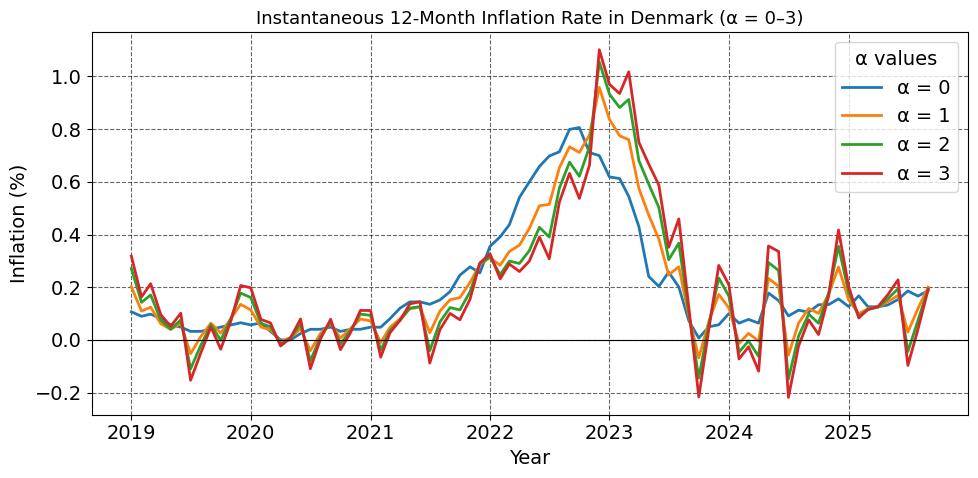

In [13]:
# Filter data since 2019
since_2019 = pris113_true[pris113_true["year"] >= 2019]

# Plot for all α values
plt.figure(figsize=(10,5))
for alpha in [0, 1, 2, 3]:
    plt.plot(
        since_2019["date"],
        since_2019[f"pi_12_instant_alpha{alpha}"] * 100,
        label=f"α = {alpha}",
        linewidth=2
    )

# Add title, labels, and grid
plt.title("Instantaneous 12-Month Inflation Rate in Denmark (α = 0–3)", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend(title="α values")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

###  Interpretation

The standard 12-month inflation rate (α=0) declines slowly because it captures price changes over an entire year.
When using higher α values, recent months weigh more heavily, so the measure responds faster as inflation changes.
This suggests that the post-pandemic inflation surge in Denmark likely ended earlier than suggested by the 12-month inflation rate, around mid to late 2023, as the weighted inflation rates have negative values, while the conventional annual rate stays positive throughout.

### 1.3. <a id='toc1_3_'></a>[Core Inflation](#toc0_)

To download the data, I once again followed the procedure as in PS 2

In [14]:
# Create an instance of the DstApi class for the PRIS111 dataset
pris111_api = DstApi('pris111') 

# Get the base parameters for the API call
params = pris111_api._define_base_params(language='en')

# Display the base parameters
display(params)

# Get the data from the API with the specified parameters
pris111 = pris111_api.get_data(params)

# Create a copy of the original dataframe to not overwrite it
pris111_true = pris111.copy()

{'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [15]:
display(pris111_true)

,VAREGR,ENHED,TID,INDHOLD
0,04.4.4.2 Security services,Index,2001M01,..
1,04.4.4.2 Security services,Percentage change compared to previous month (...,2001M01,..
2,04.4.4.2 Security services,Percentage change compared to same month the y...,2001M01,..
3,04.4.4.9 Other services related to dwelling,Index,2001M01,..
4,04.4.4.9 Other services related to dwelling,Percentage change compared to previous month (...,2001M01,..
...,...,...,...,...
343030,14.1 Overall Consumer Price Index - excl. ener...,Percentage change compared to previous month (...,2024M03,0.0
343031,14.1 Overall Consumer Price Index - excl. ener...,Percentage change compared to same month the y...,2024M03,1.7
343032,15.1 Overall Consumer Price Index excl. energy,Index,2024M03,117.2
343033,15.1 Overall Consumer Price Index excl. energy,Percentage change compared to previous month (...,2024M03,0.1


Once again, I convert TID to datetime as suggested by Hint II to be able to sort by date

In [16]:
pris111_true["date"] = pd.to_datetime(pris111_true["TID"], format="%YM%m")
pris111_true = pris111_true.sort_values("date")
display(pris111_true)


,VAREGR,ENHED,TID,INDHOLD,date
0,04.4.4.2 Security services,Index,2001M01,..,2001-01-01
774,"00 Consumer price index, total",Index,2001M01,76.7,2001-01-01
773,15.1 Overall Consumer Price Index excl. energy,Percentage change compared to same month the y...,2001M01,..,2001-01-01
772,15.1 Overall Consumer Price Index excl. energy,Percentage change compared to previous month (...,2001M01,..,2001-01-01
771,15.1 Overall Consumer Price Index excl. energy,Index,2001M01,77.4,2001-01-01
...,...,...,...,...,...
49557,10. Education,Percentage change compared to same month the y...,2025M09,4.1,2025-09-01
49558,10.1 Pre-primary and primary education,Index,2025M09,134.2,2025-09-01
49559,10.1 Pre-primary and primary education,Percentage change compared to previous month (...,2025M09,0.0,2025-09-01
49537,09.5.3-4 Miscellaneous printed matter,Index,2025M09,120.5,2025-09-01


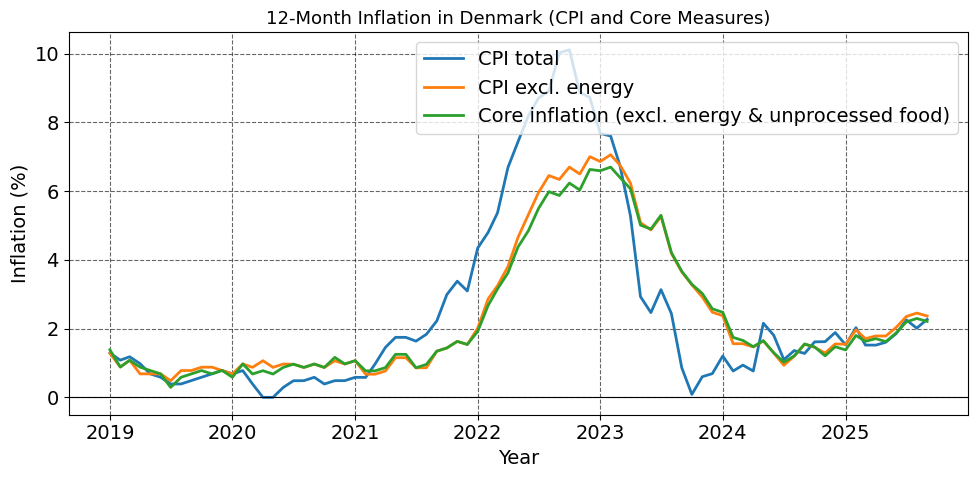

In [17]:
# Keep only observations where category is "Index"
pris111_true = pris111_true[pris111_true["ENHED"] == "Index"].copy()

# Convert INDHOLD to numeric
pris111_true["INDHOLD"] = pd.to_numeric(pris111_true["INDHOLD"], errors="coerce")

# Select relevant CPI series
selected_labels = {
    "00 Consumer price index, total": "CPI total",
    "15.1 Overall Consumer Price Index excl. energy": "CPI excl. energy",
    "14.1 Overall Consumer Price Index - excl. energy and unprocessed food (core inflation)": "Core inflation (excl. energy & unprocessed food)"
}

subset = pris111_true[pris111_true["VAREGR"].isin(selected_labels.keys())].copy()

# Calculate 12-month inflation rate for each series
subset["pi_12"] = subset.groupby("VAREGR")["INDHOLD"].pct_change(12)

# Keep only data from 2019 onward-
subset_recent = subset[subset["date"].dt.year >= 2019]

# Plot
plt.figure(figsize=(10,5))
for label_text, display_name in selected_labels.items():
    data = subset_recent[subset_recent["VAREGR"] == label_text]
    plt.plot(data["date"], data["pi_12"] * 100, label=display_name, linewidth=2)

plt.title("12-Month Inflation in Denmark (CPI and Core Measures)", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Interpretation

Energy is likely a huge driver of post-pandemic inflation as the inflation excluding energy is much smaller without it while removing unprocessed food from there hardly changes the inflation rate.

### 1.4. <a id='toc1_4_'></a>[Disaggregated Inflation in Denmark](#toc0_)

Note: I used ChatGPT to generate the following code block, as I didn't manage to get it working using the hint.

### 1.4.1 <a id='toc1_4_1_'></a>[Excercise 1.4.1](#toc0_)

In [18]:
# --- Step 1: Extract the product code (e.g. '01.1.1.1') ---
pris111_true["code"] = pris111_true["VAREGR"].str.extract(r"^(\d{2}(?:\.\d){3})")

# --- Step 2: Keep only rows with valid 4-digit codes ---
four_digit = (
    pris111_true.loc[pris111_true["code"].notna(), ["code", "VAREGR"]]
    .drop_duplicates()
    .sort_values("code")
    .reset_index(drop=True)
)

# --- Step 3: Clean the name (remove code from text) ---
four_digit["name"] = four_digit["VAREGR"].str.replace(r"^\d{2}(?:\.\d){3}\s+", "", regex=True)

# --- Step 4: Show results ---
print(f"Found {len(four_digit)} four-digit product categories.\n")
pd.set_option("display.max_rows", None)
for row in four_digit.itertuples(index=False):
    print(f"{row.code} - {row.name}")

Found 222 four-digit product categories.

01.1.1.1 - Rice
01.1.1.2 - Flours and other cereals
01.1.1.3 - Bread
01.1.1.4 - Other bakery products
01.1.1.5 - Pizza and quiche
01.1.1.6 - Pasta products and couscous
01.1.1.7 - Breakfast cereals
01.1.1.8 - Other cereal products
01.1.2.1 - Beef and veal
01.1.2.2 - Pork
01.1.2.3 - Lamb and goat
01.1.2.4 - Poultry
01.1.2.6 - Edible offal
01.1.2.7 - Dried, salted or smoked meat
01.1.2.8 - Other meat preparations
01.1.3.1 - Fresh or chilled fish
01.1.3.2 - Frozen fish
01.1.3.4 - Frozen seafood
01.1.3.5 - Dried, smoked or salted fish and seafood
01.1.3.6 - Other preserved or processed fish and seafood-based preparations
01.1.4.1 - Milk, whole, fresh
01.1.4.2 - Milk, low fat, fresh
01.1.4.4 - Yoghurt
01.1.4.5 - Cheese and curd
01.1.4.6 - Other milk products
01.1.4.7 - Eggs
01.1.5.1 - Butter
01.1.5.2 - Margarine and other vegetable fats
01.1.5.3 - Olive oil
01.1.5.4 - Other edible oils
01.1.6.1 - Fresh or chilled fruit
01.1.6.2 - Frozen fruit
01.1.6

### 1.4.2 <a id='toc1_4_2_'></a>[Excercise 1.4.2](#toc0_)

C:\Users\victo\AppData\Local\Temp\ipykernel_3320\955142898.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  subset["pi_12"] = subset.groupby("code")["INDHOLD"].pct_change(12)


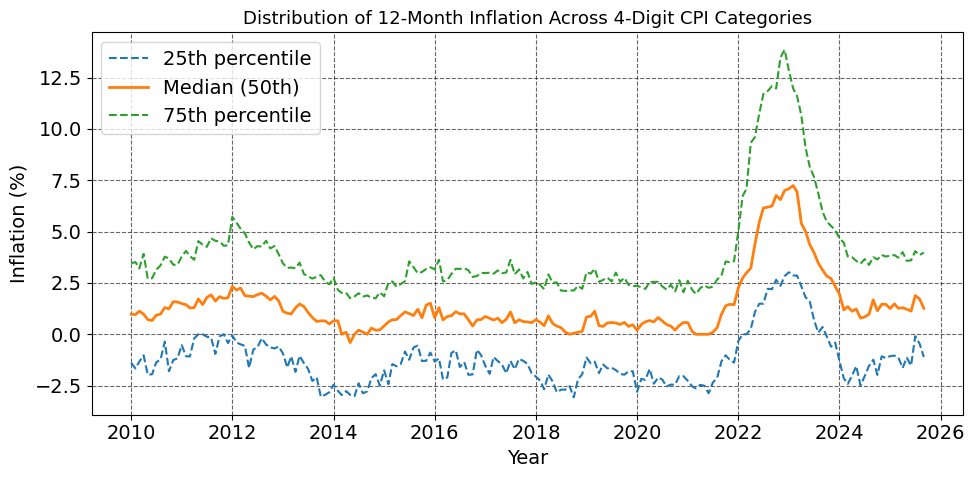

In [19]:
# Keep only valid 4-digit product codes
subset = pris111_true[pris111_true["code"].notna()].copy()

# Calculate 12-month inflation for each product
subset["pi_12"] = subset.groupby("code")["INDHOLD"].pct_change(12)

# Compute monthly 25th, 50th, and 75th percentiles across products
percentiles = (
    subset.groupby("date")["pi_12"]
    .agg(
        p25=lambda x: x.quantile(0.25),
        p50=lambda x: x.quantile(0.50),
        p75=lambda x: x.quantile(0.75)
    )
    .reset_index()
)

# Plot percentile trends over time
plt.figure(figsize=(10, 5))
plt.plot(percentiles["date"], percentiles["p25"] * 100, label="25th percentile", linestyle="--")
plt.plot(percentiles["date"], percentiles["p50"] * 100, label="Median (50th)", linewidth=2)
plt.plot(percentiles["date"], percentiles["p75"] * 100, label="75th percentile", linestyle="--")

plt.title("Distribution of 12-Month Inflation Across 4-Digit CPI Categories", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretation

The figure shows how 12-month inflation across different CPI categories evolved over time. Inflation was quite stable before 2020, with the median around 1–2%. Starting in 2021, inflation rose sharply across most categories, peaking in 2022 with over 12.5% for the 75th percentile. By 2024, it fell back to around pre-pandemic levels.

### 1.4.3 <a id='toc1_4_3_'></a>[Excercise 1.4.3](#toc0_)

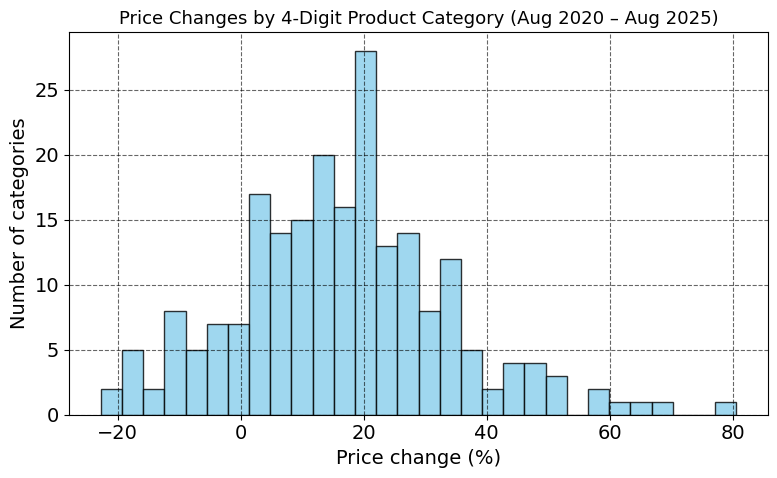

In [20]:
# Extract CPI values for August 2020 and August 2025
start = subset[subset["date"] == "2020-08-01"]
end = subset[subset["date"] == "2025-08-01"]

# Merge to match products by code
merged = pd.merge(
    start[["code", "INDHOLD"]],
    end[["code", "INDHOLD"]],
    on="code",
    suffixes=("_2020", "_2025")
)

# Calculate the percentage change in prices over the 5-year period
merged["pct_change"] = (merged["INDHOLD_2025"] / merged["INDHOLD_2020"] - 1) * 100

# Plot histogram 
plt.figure(figsize=(8,5))
plt.hist(merged["pct_change"], bins=30, color="skyblue", edgecolor="black", alpha=0.8)

plt.title("Price Changes by 4-Digit Product Category (Aug 2020 – Aug 2025)", fontsize=13)
plt.xlabel("Price change (%)")
plt.ylabel("Number of categories")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretation
The histogram shows how prices changed across product categories between August 2020 and August 2025. Most prices went up, and the distribution of price change is quite heavily right-skewed meaning many categories saw large(r) increases, while only a handful experienced little change or price declines.

### 1.4.4 <a id='toc1_4_4_'></a>[Excercise 1.4.4](#toc0_)

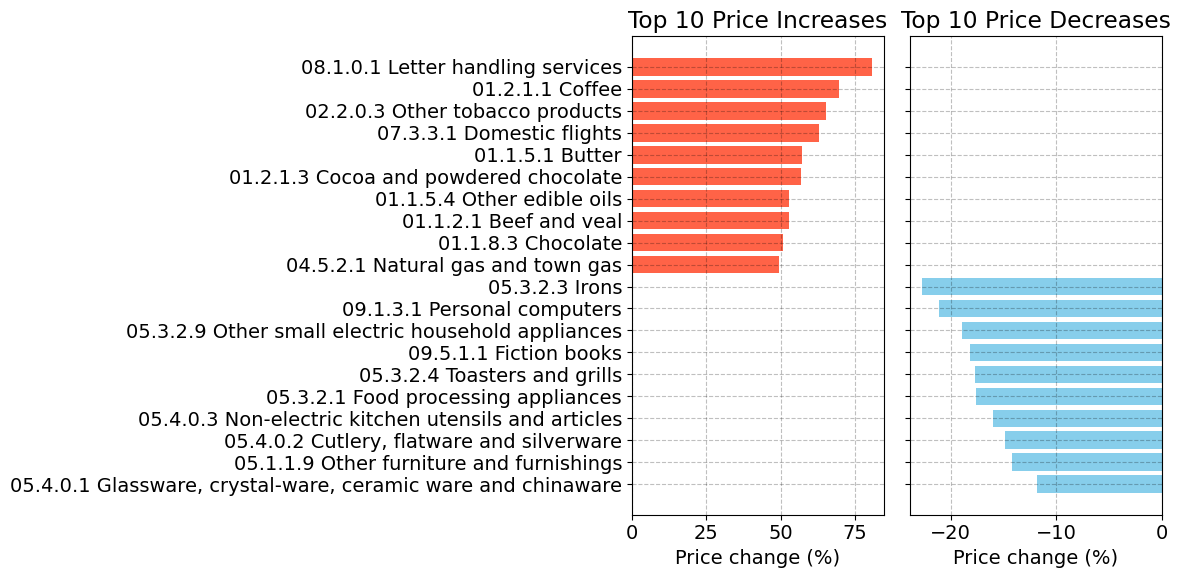

In [21]:
# Merge price changes with product names
merged = merged.merge(
    pris111_true[["code", "VAREGR"]].drop_duplicates(),
    on="code",
    how="left"
)

# Identify top 10 and bottom 10 product categories by price change
top10 = merged.nlargest(10, "pct_change")
bottom10 = merged.nsmallest(10, "pct_change")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Top 10 largest price increases
axes[0].barh(top10["VAREGR"], top10["pct_change"], color="tomato")
axes[0].set_title("Top 10 Price Increases")
axes[0].set_xlabel("Price change (%)")
axes[0].invert_yaxis()  

# Bottom 10 largest price decreases
axes[1].barh(bottom10["VAREGR"], bottom10["pct_change"], color="skyblue")
axes[1].set_title("Top 10 Price Decreases")
axes[1].set_xlabel("Price change (%)")

plt.tight_layout()
plt.show()

## 2. <a id='toc2_'></a>[International Comparison](#toc0_)

### 2.1. <a id='toc2_1_'></a>[CPI vs HICP](#toc0_)

I installed fredapi as it was not yet in my environment

In [22]:
!pip install fredapi

In [23]:
from fredapi import Fred

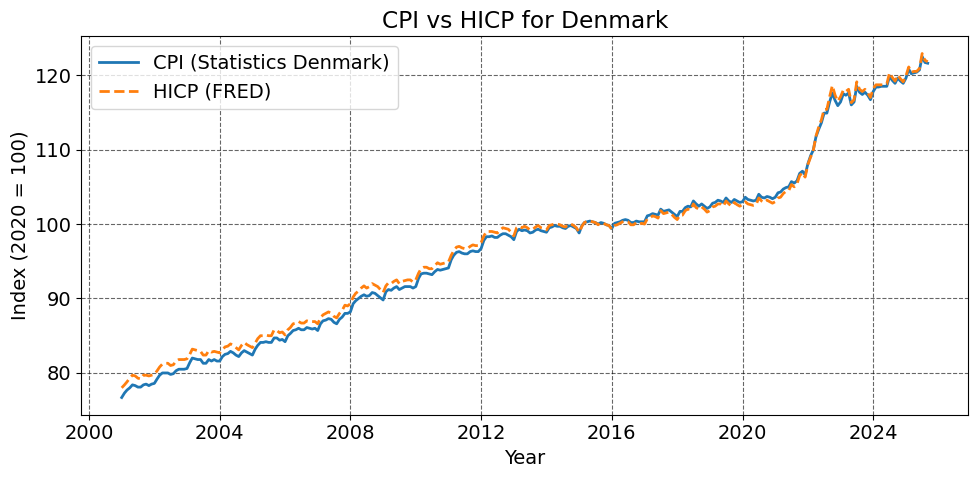

In [24]:
# Get CPI from Statistics Denmark and create a date index, like in the excercises before
cpi = pris111_true[pris111_true["VAREGR"] == "00 Consumer price index, total"].copy()
cpi["date"] = pd.to_datetime(cpi["TID"], format="%YM%m")
cpi["INDHOLD"] = pd.to_numeric(cpi["INDHOLD"], errors="coerce")
cpi = cpi[["date", "INDHOLD"]].rename(columns={"INDHOLD": "CPI_Denmark"})

# Get HICP from FRED and convert to a DataFrame
fred = Fred(api_key="5cd26391edcacfe9abf1f1b368deb1d1")
hicp = fred.get_series("CP0000DKM086NEST")
hicp = hicp.to_frame(name="HICP_FRED")
hicp.index = pd.to_datetime(hicp.index)
hicp.reset_index(inplace=True)
hicp.rename(columns={"index": "date"}, inplace=True)

# Merge data by date
merged = pd.merge(cpi, hicp, on="date", how="inner")

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(merged["date"], merged["CPI_Denmark"], label="CPI (Statistics Denmark)", linewidth=2)
plt.plot(merged["date"], merged["HICP_FRED"], label="HICP (FRED)", linewidth=2, linestyle="--")

plt.title("CPI vs HICP for Denmark")
plt.xlabel("Year")
plt.ylabel("Index (2020 = 100)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretation

I think that the two index almost look indentical and thus, should be comparable.

### 2.2. <a id='toc2_2_'></a>[Across Countries](#toc0_)

To do excercise 2.2, I first researched which series are available for the specified countries/regions.

In [25]:
# Initialize session
fred = Fred(api_key="5cd26391edcacfe9abf1f1b368deb1d1")

In [26]:
fred.search('Euro area HICP all items')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CP0000EZ19M086NEST,CP0000EZ19M086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,1996-01-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:36:21-05:00,63,"Copyright, European Union, 1995-2016, http://e..."
EA19CPHPTT01IXEBM,EA19CPHPTT01IXEBM,2025-10-28,2025-10-28,Consumer Price Index: Harmonised Prices: All I...,1990-01-01,2023-01-01,Monthly,M,Index Eurostat base,Index Eurostat base,Not Seasonally Adjusted,NSA,2023-03-15 13:15:31-05:00,5,OECD descriptor ID: CPHPTT01 OECD unit ID: IXE...
TOTNRGFOODEA20MI15XM,TOTNRGFOODEA20MI15XM,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: Overall I...,2000-12-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:11:03-05:00,26,"Copyright, European Union, 1995-2016, http://e..."
EA19CPHPLA01GYM,EA19CPHPLA01GYM,2025-10-28,2025-10-28,Consumer Price Index: Harmonised Prices: All I...,1997-01-01,2023-01-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-03-15 13:15:10-05:00,10,OECD descriptor ID: CPHPLA01 OECD unit ID: GY ...
EA19CPHPLA01GPM,EA19CPHPLA01GPM,2025-10-28,2025-10-28,Consumer Price Index: Harmonised Prices: All I...,1996-02-01,2023-01-01,Monthly,M,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2023-03-15 13:15:12-05:00,10,OECD descriptor ID: CPHPLA01 OECD unit ID: GP ...
CP00MI15EA20M086NEST,CP00MI15EA20M086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,1999-12-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:36:20-05:00,15,"Copyright, European Union, 1995-2016, http://e..."
CP0000EZCCM086NEST,CP0000EZCCM086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,1996-01-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:36:20-05:00,14,"Copyright, European Union, 1995-2016, http://e..."
CP0000EZ17M086NEST,CP0000EZ17M086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All Items...,1996-01-01,2015-12-01,Monthly,M,Index 2005=100,Index 2005=100,Not Seasonally Adjusted,NSA,2016-01-22 17:48:44-06:00,12,"Copyright, European Union, 1995-2016, http://e..."
CP0000EZ18M086NEST,CP0000EZ18M086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All Items...,1996-01-01,2022-11-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2022-12-16 07:10:21-06:00,2,"Copyright, European Union, 1995-2016, http://e..."


In [27]:
fred.search('Denmark HICP all items')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CP0000DKM086NEST,CP0000DKM086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,1996-01-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:36:22-05:00,26,"Copyright, European Union, 1995-2016, http://e..."
DNKCPIALLMINMEI,DNKCPIALLMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1967-01-01,2025-04-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:19:22-05:00,6,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
DNKCPALTT01CTGYM,DNKCPALTT01CTGYM,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",2010-01-01,2025-04-01,Monthly,M,"Contribution to growth rate, over 1 year","Contribution to growth rate, over 1 Yr.",Not Seasonally Adjusted,NSA,2025-05-15 14:19:34-05:00,5,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
CPALTT01DKQ659N,CPALTT01DKQ659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1967-01-01,2025-01-01,Quarterly,Q,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-04-15 14:19:05-05:00,3,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
DNKCPIALLQINMEI,DNKCPIALLQINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1967-01-01,2025-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-04-15 14:18:44-05:00,2,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
DNKCPIALLAINMEI,DNKCPIALLAINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1967-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-01-15 14:08:55-06:00,1,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
DNKCPIHICMINMEI,DNKCPIHICMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1990-01-01,2025-03-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:19:22-05:00,1,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
DNKCPIHICAINMEI,DNKCPIHICAINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1990-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-02-17 14:08:12-06:00,1,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...
CPALTT01DKM659N,CPALTT01DKM659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1967-01-01,2025-04-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-05-15 14:19:48-05:00,1,OECD Data Filters: REF_AREA: DNK MEASURE: CPI...


In [28]:
fred.search('Austria HICP all items')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CP0000ATM086NEST,CP0000ATM086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,1996-01-01,2025-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-10-17 07:36:24-05:00,22,"Copyright, European Union, 1995-2016, http://e..."
AUTCPIALLQINMEI,AUTCPIALLQINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2025-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:17:39-05:00,7,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
AUTCPALTT01CTGYM,AUTCPALTT01CTGYM,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",2010-01-01,2025-03-01,Monthly,M,"Contribution to growth rate, over 1 year","Contribution to growth rate, over 1 Yr.",Not Seasonally Adjusted,NSA,2025-05-15 14:20:45-05:00,7,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
AUTCPIALLAINMEI,AUTCPIALLAINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-02-17 14:08:06-06:00,3,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
AUTCPIALLMINMEI,AUTCPIALLMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2025-03-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:20:42-05:00,3,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
AUTCPIHICAINMEI,AUTCPIHICAINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1996-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-02-17 14:08:05-06:00,2,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
CPALTT01ATM659N,CPALTT01ATM659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1959-01-01,2025-03-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-05-15 14:20:11-05:00,2,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
AUTCPIHICMINMEI,AUTCPIHICMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1996-01-01,2025-04-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:20:42-05:00,1,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...
CPALTT01ATQ659N,CPALTT01ATQ659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1959-01-01,2025-01-01,Quarterly,Q,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-05-15 14:17:37-05:00,1,OECD Data Filters: REF_AREA: AUT MEASURE: CPI...


In [29]:
fred.search('USA HICP all items')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CP0000USM086NEST,CP0000USM086NEST,2025-10-28,2025-10-28,Harmonized Index of Consumer Prices: All-Items...,2001-12-01,2024-12-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-01-17 07:10:02-06:00,43,"Copyright, European Union, 1995-2016, http://e..."
USACPGRLE01IXOBSAQ,USACPGRLE01IXOBSAQ,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-10-01,Quarterly,Q,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2025-02-17 13:53:10-06:00,22,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
USACPICORMINMEI,USACPICORMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2025-04-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:16:48-05:00,12,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
USACPGRLE01IXOBSAM,USACPGRLE01IXOBSAM,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-12-01,Monthly,M,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2025-02-17 13:53:10-06:00,4,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
USACPICORQINMEI,USACPICORQINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2025-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-04-15 14:16:42-05:00,3,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
USACPICORAINMEI,USACPICORAINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-02-17 13:56:08-06:00,2,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
CPGRLE01USM659N,CPGRLE01USM659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2025-04-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-05-15 14:17:28-05:00,13,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
CPGRLE01USQ659N,CPGRLE01USQ659N,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2025-01-01,Quarterly,Q,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-04-15 14:17:56-05:00,6,OECD Data Filters: REF_AREA: USA MEASURE: CPI...
USACPIALLMINMEI,USACPIALLMINMEI,2025-10-28,2025-10-28,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1955-01-01,2025-04-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:16:57-05:00,47,OECD Data Filters: REF_AREA: USA MEASURE: CPI...


I settled on the first result of all four searches: Harmonized Index of Consumer Prices: All-Items HICP for "country x"

    "CP0000DKM086NEST",  # Denmark
    "CP0000ATM086NEST",  # Austria
    "CP0000EZ19M086NEST",# Euro Area
    "CP0000USM086NEST"   # United States

### 2.2.1 <a id='toc2_2_1_'></a>[Excercise 2.2.1](#toc0_)

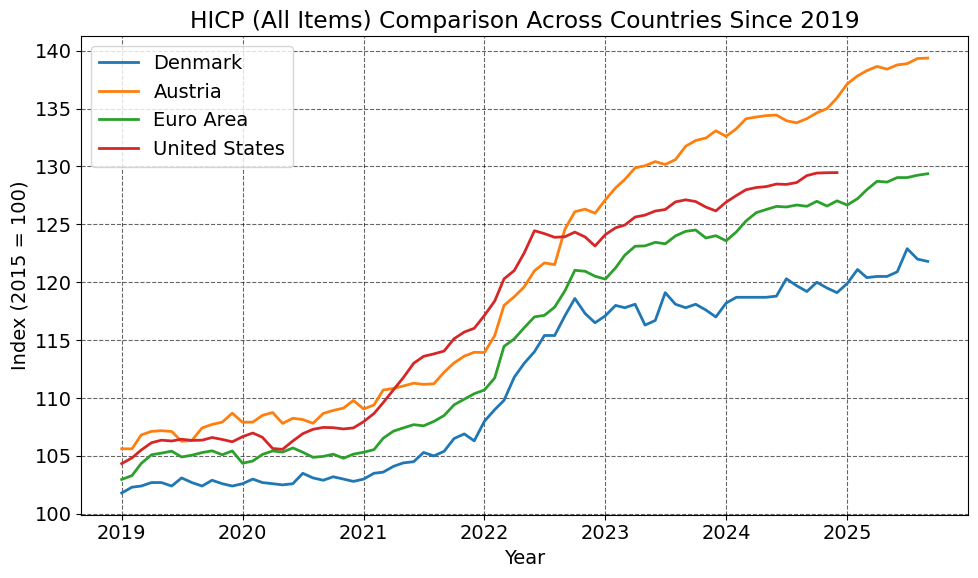

In [30]:
# Download HICP data for selected countries and combine into a single dataframe
series = {
    "Denmark": "CP0000DKM086NEST",
    "Austria": "CP0000ATM086NEST",
    "Euro Area": "CP0000EZ19M086NEST",
    "United States": "CP0000USM086NEST"
}

data = pd.DataFrame()

for country, code in series.items():
    temp = fred.get_series(code)
    temp = temp.to_frame(name=country)
    data = pd.concat([data, temp], axis=1)

# Keep data from 2019 onward
data.index = pd.to_datetime(data.index)
data = data[data.index >= "2019-01-01"]

# Plot HICP index comparison across countries
plt.figure(figsize=(10,6))
for country in data.columns:
    plt.plot(data.index, data[country], label=country, linewidth=2)

plt.title("HICP (All Items) Comparison Across Countries Since 2019")
plt.xlabel("Year")
plt.ylabel("Index (2015 = 100)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 2.2.2 <a id='toc2_2_2_'></a>[Excercise 2.2.2](#toc0_)

For the next exercise, I noticed that the U.S. series only extends through the end of 2024, so I limited the comparison period to match that timeframe.

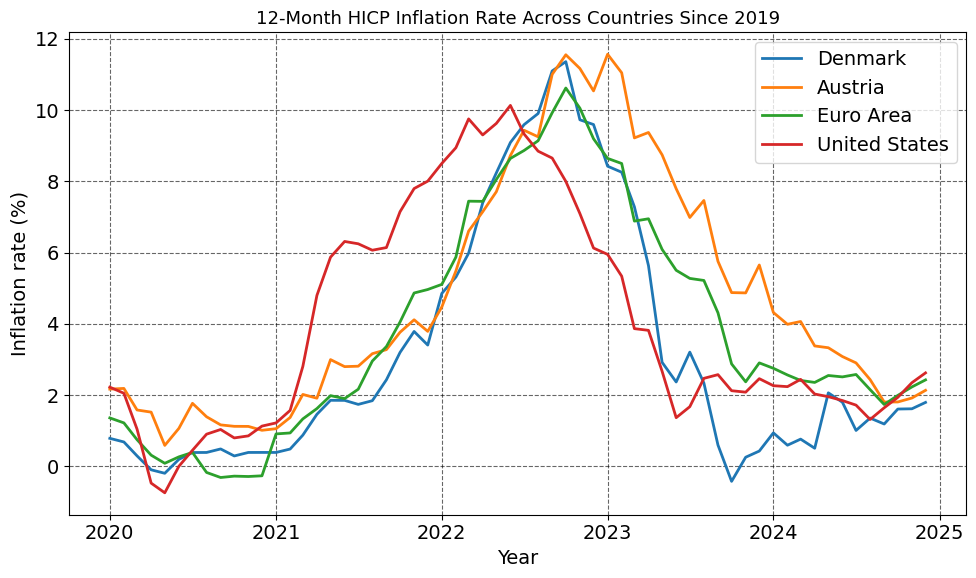

In [31]:
# Restrict to overlapping period
data = data.loc[:'2024-12-01']

# Calculate 12-month HICP inflation rate for each country
hicp_infl = data.pct_change(12) * 100

# Drop rows with missing data to align all countries
hicp_infl = hicp_infl.dropna()

# Plot 12-month inflation rates across countries
plt.figure(figsize=(10,6))
for country in hicp_infl.columns:
    plt.plot(hicp_infl.index, hicp_infl[country], label=country, linewidth=2)

plt.title("12-Month HICP Inflation Rate Across Countries Since 2019", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Inflation rate (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 2.2.3 <a id='toc2_2_3_'></a>[Excercise 2.2.3](#toc0_)

In [32]:
# Compute yearly summary statistics
hicp_infl['year'] = hicp_infl.index.year
summary_yearly = hicp_infl.groupby('year').agg(['min', 'max', 'mean']).round(2)
print("Year-by-year summary across countries:")
print(summary_yearly)


Year-by-year summary across countries:
     Denmark              Austria              Euro Area               \
         min    max  mean     min    max  mean       min    max  mean   
year                                                                    
2020   -0.19   0.79  0.33    0.59   2.19  1.39     -0.31   1.36  0.26   
2021    0.39   3.79  1.94    1.06   4.11  2.76      0.91   4.96  2.59   
2022    4.85  11.36  8.51    4.48  11.55  8.59      5.11  10.62  8.36   
2023   -0.42   8.43  3.44    4.87  11.57  7.78      2.37   8.64  5.46   
2024    0.51   2.06  1.27    1.81   4.32  2.93      1.74   2.75  2.36   

     United States               
               min    max  mean  
year                             
2020         -0.74   2.22  0.77  
2021          1.22   8.01  5.33  
2022          6.13  10.13  8.69  
2023          1.37   5.95  3.03  
2024          1.32   2.62  2.03  


### Summary of cross-country differences in 12-month inflation since 2019

Inflation was low in Europe during 2020–2021, averaging around 2% across the European countries, while it reached about 5% in the U.S. in 2021. In 2022, inflation peaked at roughly 8.5% across all regions. By 2023, it fell noticeably in Denmark (3.4%) and the U.S. (3.0%) but remained elevated in Austria (7.8%) and the Euro Area (5.5%). In 2024, inflation stabilized between 1% and 3% in all four economies.

## 3. <a id='toc3_'></a>[Extension](#toc0_)

For the open-ended question, I examined the inflation of Danish household spending on housing. The PRIS111 table from Statistics Denmark provides suitable data for this, including the following categories:

    "04.1 Actual rentals for housing",
    "04.2 Imputed rentals for housing",
    "04.3 Maintenance and repair of the dwelling",
    "04.4 Water supply and miscellaneous services relating to the dwelling",
    "04.5 Electricity, gas and other fuels"

I plotted the price developments of these components alongside the total CPI to show which parts of housing expenditure increased more or less than overall consumer prices.

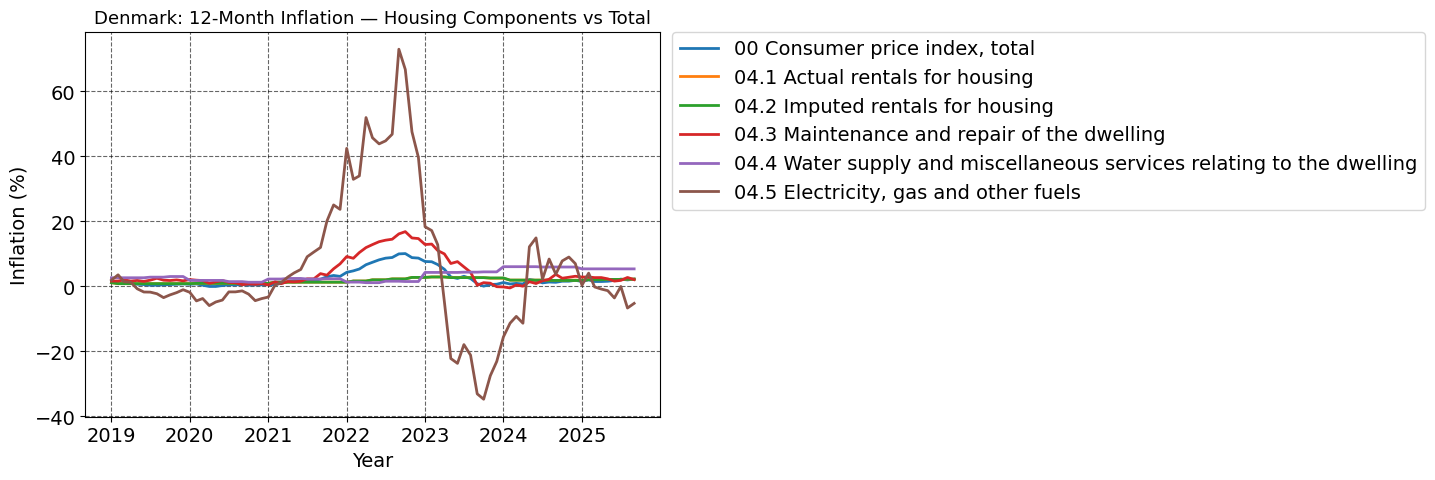

In [33]:
# Filter for relevant CPI categories
keep = [
    "00 Consumer price index, total",
    "04.1 Actual rentals for housing",
    "04.2 Imputed rentals for housing",
    "04.3 Maintenance and repair of the dwelling",
    "04.4 Water supply and miscellaneous services relating to the dwelling",
    "04.5 Electricity, gas and other fuels"
]

subset = pris111_true[pris111_true["VAREGR"].isin(keep)].copy()

# Compute 12-month inflation for each series
subset["pi12"] = subset.groupby("VAREGR")["INDHOLD"].pct_change(12) * 100

# Keep data from 2019 onward
subset = subset[subset["date"].dt.year >= 2019]

# Plot each CPI component
plt.figure(figsize=(10,5))
for name, g in subset.groupby("VAREGR"):
    plt.plot(g["date"], g["pi12"], label=name, linewidth=2)

plt.title("Denmark: 12-Month Inflation — Housing Components vs Total", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(right=0.7)  # leave space on the right side for legend

plt.show()


The graph reveals a compelling (but not surprising) economic insight:

Before 2021, inflation was relatively stable across all housing components and even slightly negative for electricity, gas, and other fuels. From mid-2021 to 2022, however, the energy component (04.5) surged dramatically, with inflation peaking above 60%. Maintenance and repair of dwellings (04.3) also rose sharply, reaching nearly 15% in 2022 likely reflecting higher construction and material costs, partly driven by elevated energy prices.

In contrast, rental components (04.1 and 04.2) remained remarkably stable around zero percent throughout the period.

Overall, the figure illustrates that the energy component, rather than rent, was the primary driver of volatility in Denmark’s housing-related inflation.